# ECE-5831 - Course Project - Traffic Sign Recoginition

## importing libaray funtions 

In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)
import random
from matplotlib.image import imread
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
import seaborn as sns

from matplotlib import style
style.use('fivethirtyeight')

2023-12-10 22:31:26.975745: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-10 22:31:27.093995: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 22:31:27.094138: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 22:31:27.094402: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 22:31:27.158727: I tensorflow/core/platform/cpu_feature_g

# Importing Traffic sign dataset

In [4]:
data_dir = '/home/pramod/ECE-5831/ece5831-2023-assignments/project/archive'
train_path = '/home/pramod/ECE-5831/ece5831-2023-assignments/project/archive/Train'
test_path = '/home/pramod/ECE-5831/ece5831-2023-assignments/project/archive/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [5]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

## Traffic sign classes

In [6]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Number of images of each traffic signs

[(420, 'Dangerous curve left'), (420, 'Go straight or left'), (420, 'Speed limit (20km/h)'), (480, 'End no passing veh > 3.5 tons'), (480, 'End of no passing'), (480, 'End speed + passing limits'), (480, 'Pedestrians'), (540, 'Bicycles crossing'), (540, 'Road narrows on the right'), (600, 'Keep left'), (660, 'Double curve'), (720, 'Dangerous curve right'), (720, 'Roundabout mandatory'), (780, 'Bumpy road'), (780, 'Go straight or right'), (840, 'End of speed limit (80km/h)'), (840, 'Turn left ahead'), (840, 'Veh > 3.5 tons prohibited'), (900, 'Beware of ice/snow'), (1020, 'Slippery road'), (1080, 'Children crossing'), (1200, 'Traffic signals'), (1260, 'No vehicles'), (1378, 'Turn right ahead'), (1560, 'Stop'), (1560, 'Wild animals crossing'), (2220, 'No entry'), (2400, 'Ahead only'), (2400, 'General caution'), (2640, 'Right-of-way at intersection'), (2820, 'Speed limit (120km/h)'), (2820, 'Speed limit (60km/h)'), (2880, 'Speed limit (100km/h)'), (2940, 'No passing'), (3000, 'Road work')

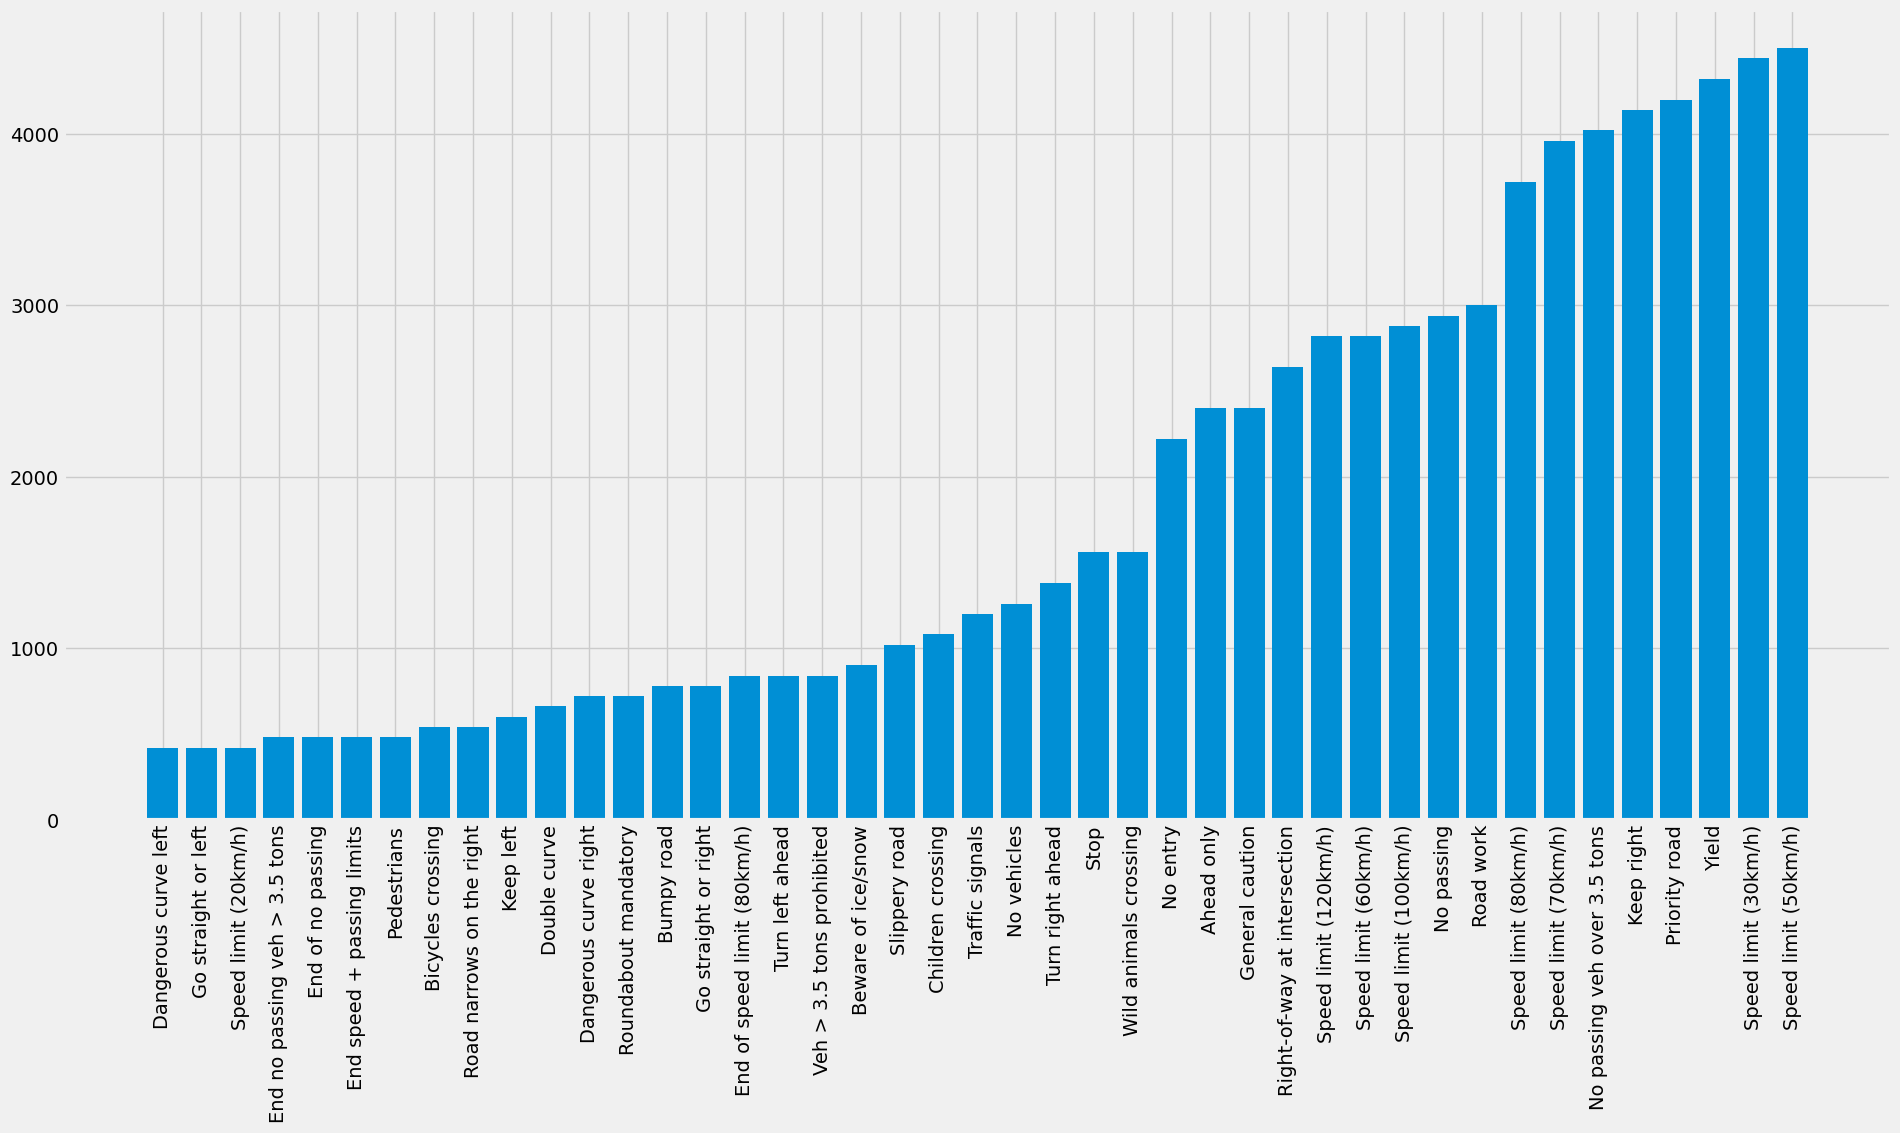

In [7]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
print(zipped_lists)
sorted_pairs = sorted(zipped_lists)
print(sorted_pairs)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

## Displaying random traffic signs from the dataset

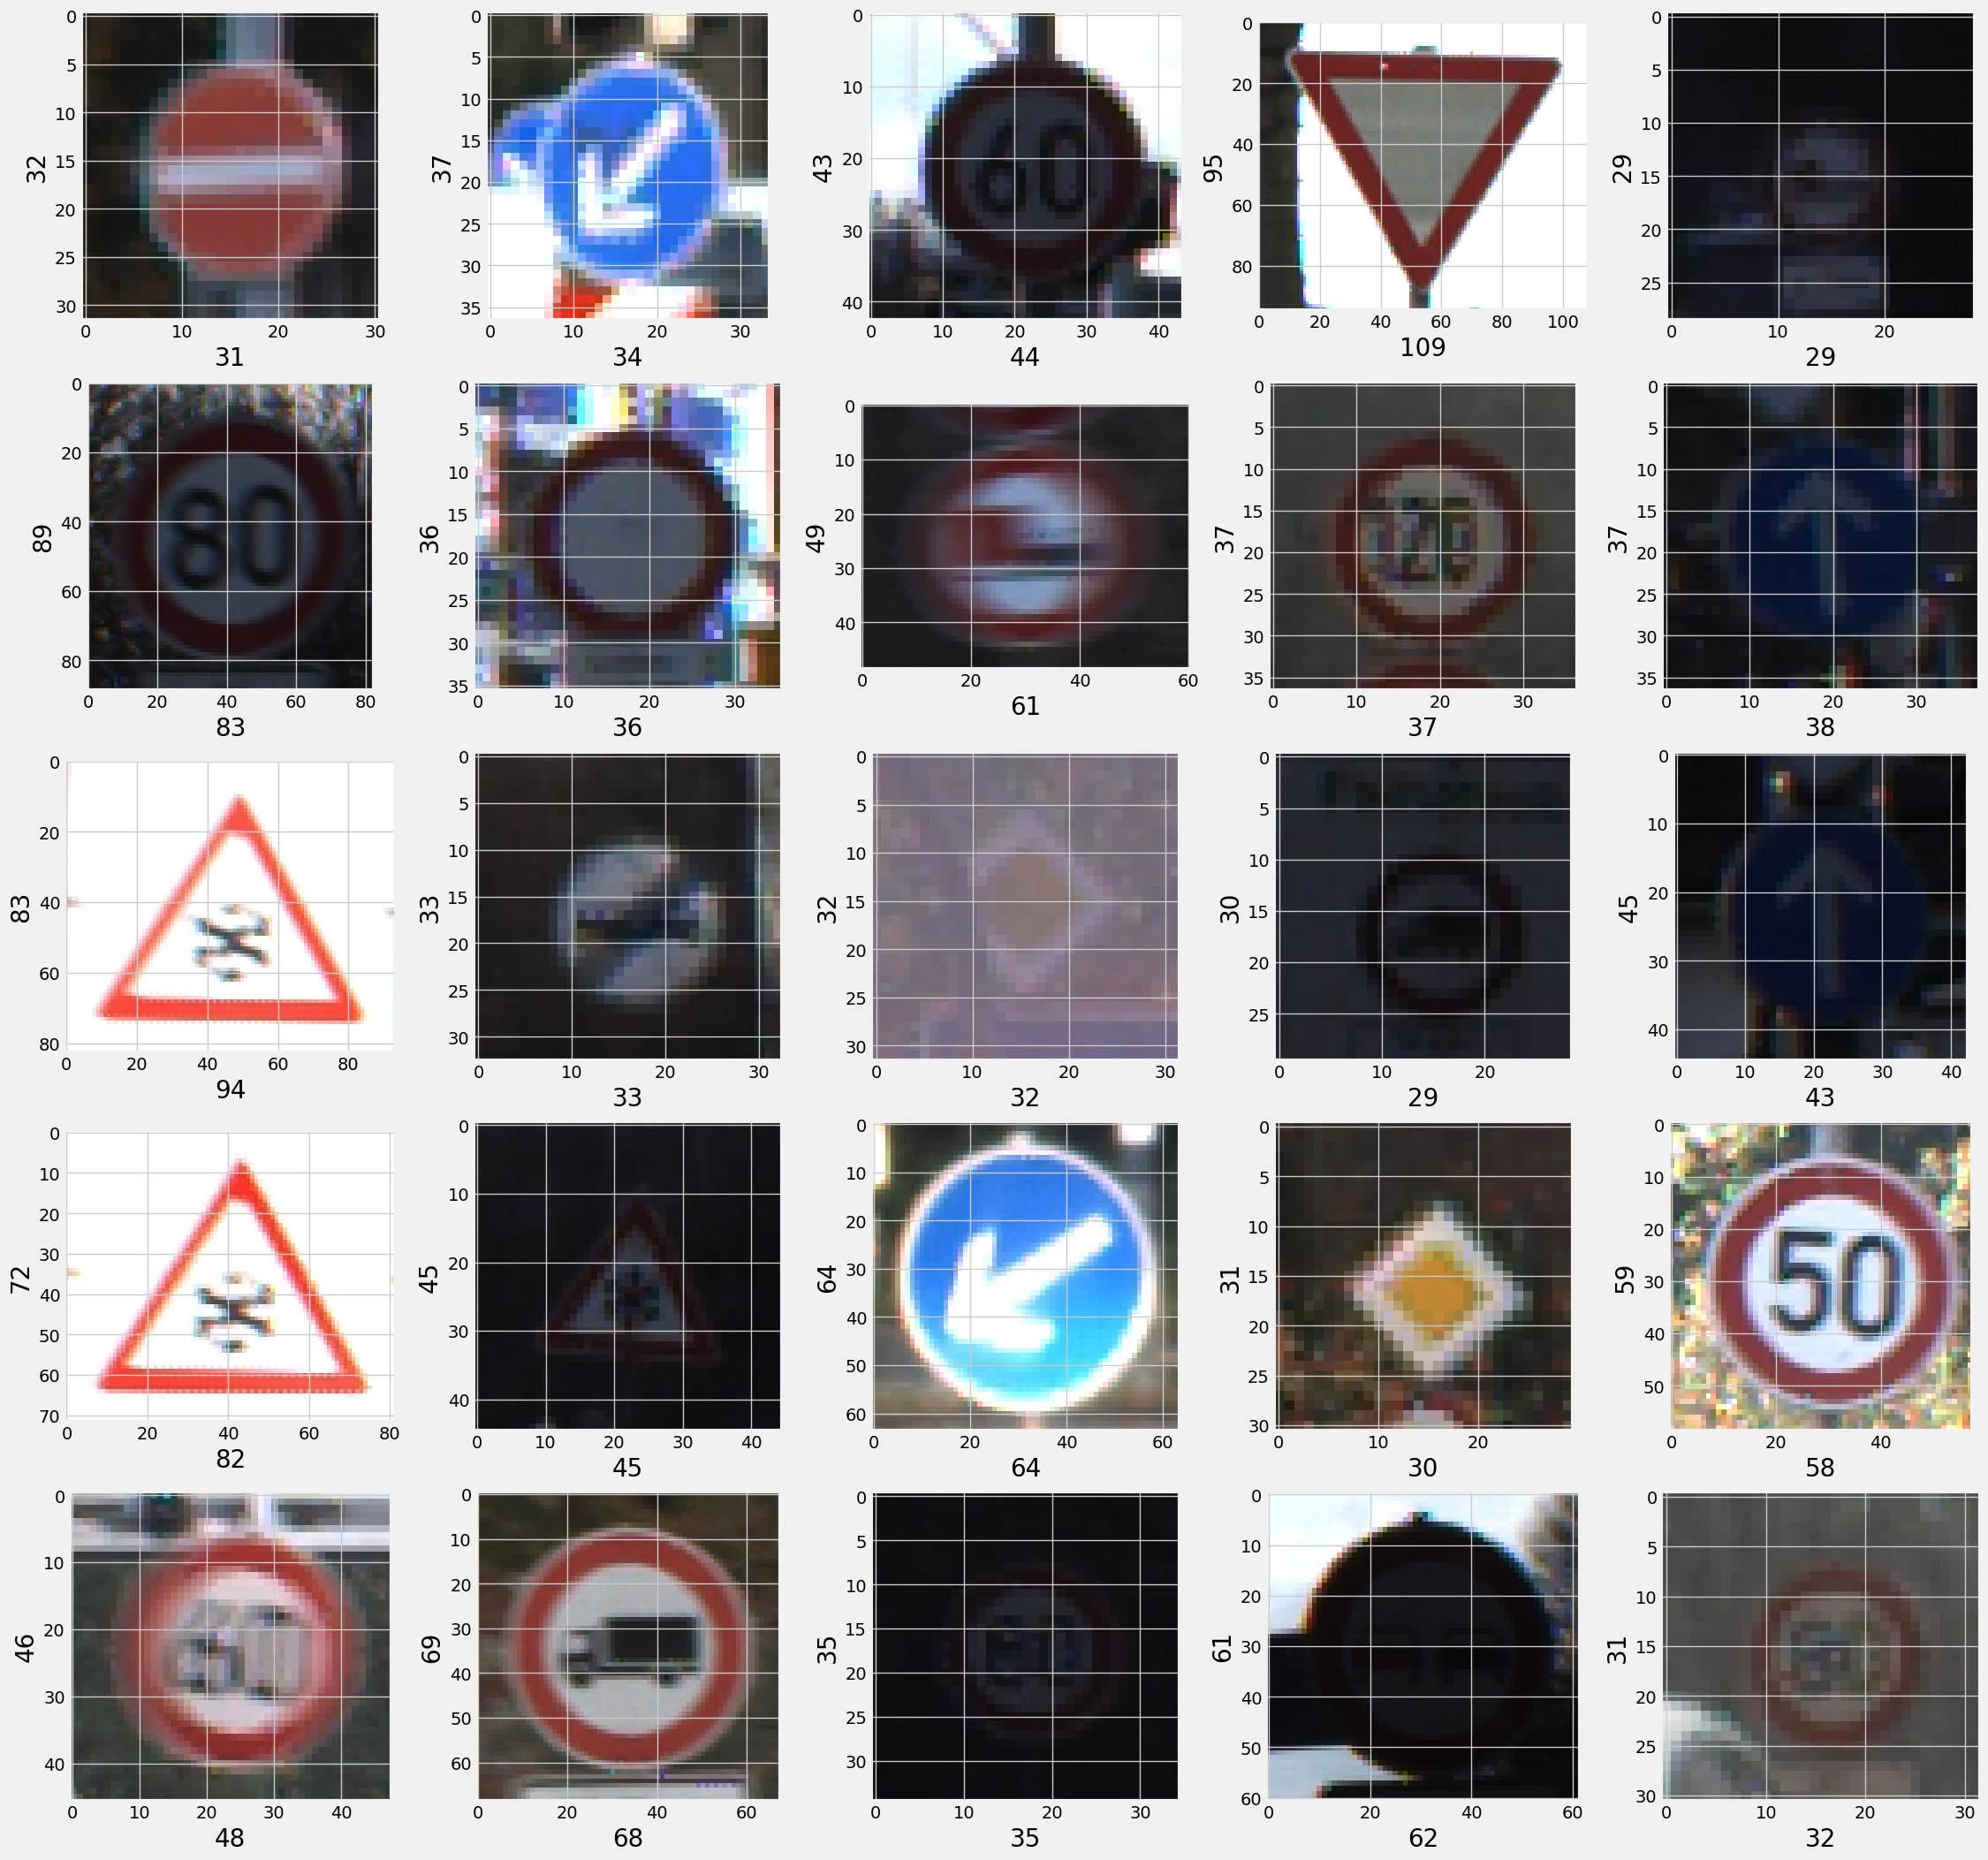

In [8]:
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image


In [9]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

Error in 00000_00000_00000.png:Zone.Identifier
Error in 00000_00006_00008.png:Zone.Identifier
Error in 00000_00000_00020.png:Zone.Identifier
Error in 00000_00000_00007.png:Zone.Identifier
Error in 00000_00003_00003.png:Zone.Identifier
Error in 00000_00006_00002.png:Zone.Identifier
Error in 00000_00003_00012.png:Zone.Identifier
Error in 00000_00004_00013.png:Zone.Identifier
Error in 00000_00000_00025.png:Zone.Identifier
Error in 00000_00000_00006.png:Zone.Identifier
Error in 00000_00002_00023.png:Zone.Identifier
Error in 00000_00001_00008.png:Zone.Identifier
Error in 00000_00004_00023.png:Zone.Identifier
Error in 00000_00001_00019.png:Zone.Identifier
Error in 00000_00005_00026.png:Zone.Identifier
Error in 00000_00006_00028.png:Zone.Identifier
Error in 00000_00000_00013.png:Zone.Identifier
Error in 00000_00005_00017.png:Zone.Identifier
Error in 00000_00005_00016.png:Zone.Identifier
Error in 00000_00000_00018.png:Zone.Identifier
Error in 00000_00006_00009.png:Zone.Identifier
Error in 0000

In [10]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

## Train and validation dataset info

In [11]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [12]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


## Model Info

In [13]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

2023-12-10 22:31:46.912937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 22:31:46.974108: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 22:31:46.974883: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 22:31:46.980713: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 22:31:46.981334: I tensorflow/compile

## Hyper Parameters

In [14]:
learning_rate = 0.001
epochs = 30

opt = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate, decay=learning_rate / (epochs * 0.5))    
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Model training

In [15]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30


2023-12-10 22:31:49.425398: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-10 22:31:49.744846: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-10 22:31:50.070360: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


858/858 [==============================] - 17s 17ms/step - loss: 1.1244 - accuracy: 0.7000 - val_loss: 0.0947 - val_accuracy: 0.9708
Epoch 2/30
858/858 [==============================] - 13s 16ms/step - loss: 0.1678 - accuracy: 0.9492 - val_loss: 0.0487 - val_accuracy: 0.9858
Epoch 3/30
858/858 [==============================] - 13s 15ms/step - loss: 0.1102 - accuracy: 0.9667 - val_loss: 0.0319 - val_accuracy: 0.9904
Epoch 4/30
858/858 [==============================] - 13s 15ms/step - loss: 0.0841 - accuracy: 0.9745 - val_loss: 0.0166 - val_accuracy: 0.9959
Epoch 5/30
858/858 [==============================] - 14s 16ms/step - loss: 0.0670 - accuracy: 0.9795 - val_loss: 0.0125 - val_accuracy: 0.9965
Epoch 6/30
858/858 [==============================] - 14s 16ms/step - loss: 0.0541 - accuracy: 0.9840 - val_loss: 0.0102 - val_accuracy: 0.9976
Epoch 7/30
858/858 [==============================] - 14s 16ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0267 - val_accuracy: 0.9918
Epo

## Model summary and save the model

In [16]:
model.summary()
model.save('TSR_30.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         7

/home/pramod/anaconda3/envs/ece5831-2023-py3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model acrhitecture

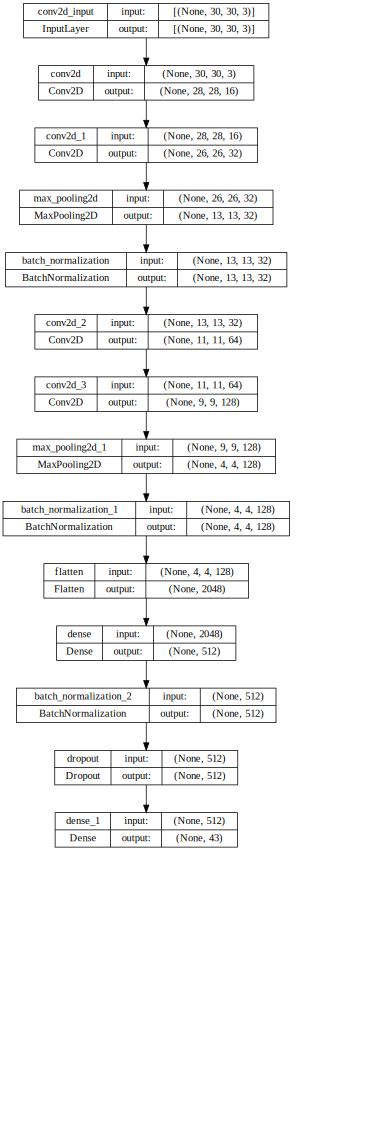

In [17]:
# Assuming model is the name of your Sequential model
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True, to_file='traffic_sign_model.png')

# Display the plot in SVG format
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, expand_nested=True).create(prog='dot',format='svg'))

## Ploting loss and accuracy graph

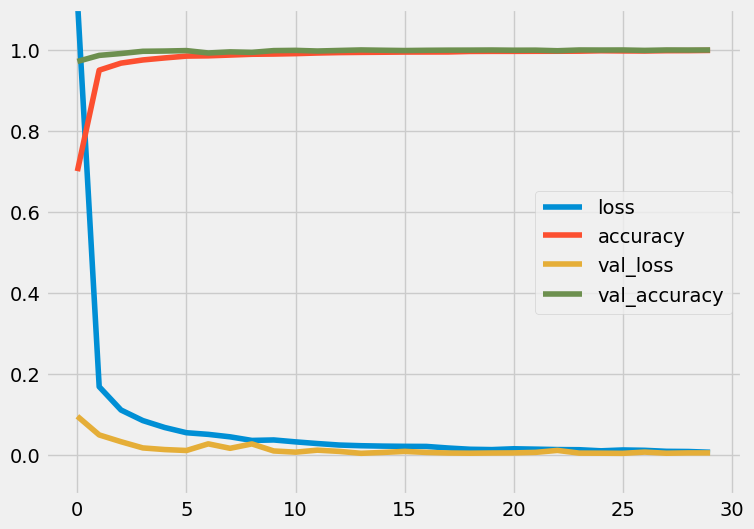

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(-0.1, 1.1)
plt.show()

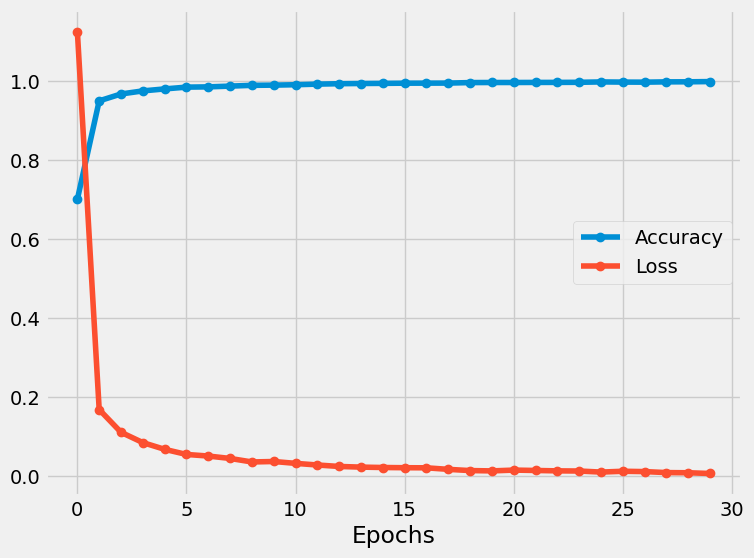

In [27]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(8, 6))
plt.plot(history_df['accuracy'], label='Accuracy', marker='o')
plt.plot(history_df['loss'], label='Loss', marker='o')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Model accuracy

In [20]:

test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except Exception as e:
        print("Error in " + img, e)

X_test = np.array(data)
X_test = X_test / 255

# Use model.predict to get predictions
pred_probabilities = model.predict(X_test)
pred = np.argmax(pred_probabilities, axis=1)

# Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred) * 100)


395/395 [==============================] - 2s 4ms/step
Test Data accuracy:  98.54315122723673


## confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

<Axes: >

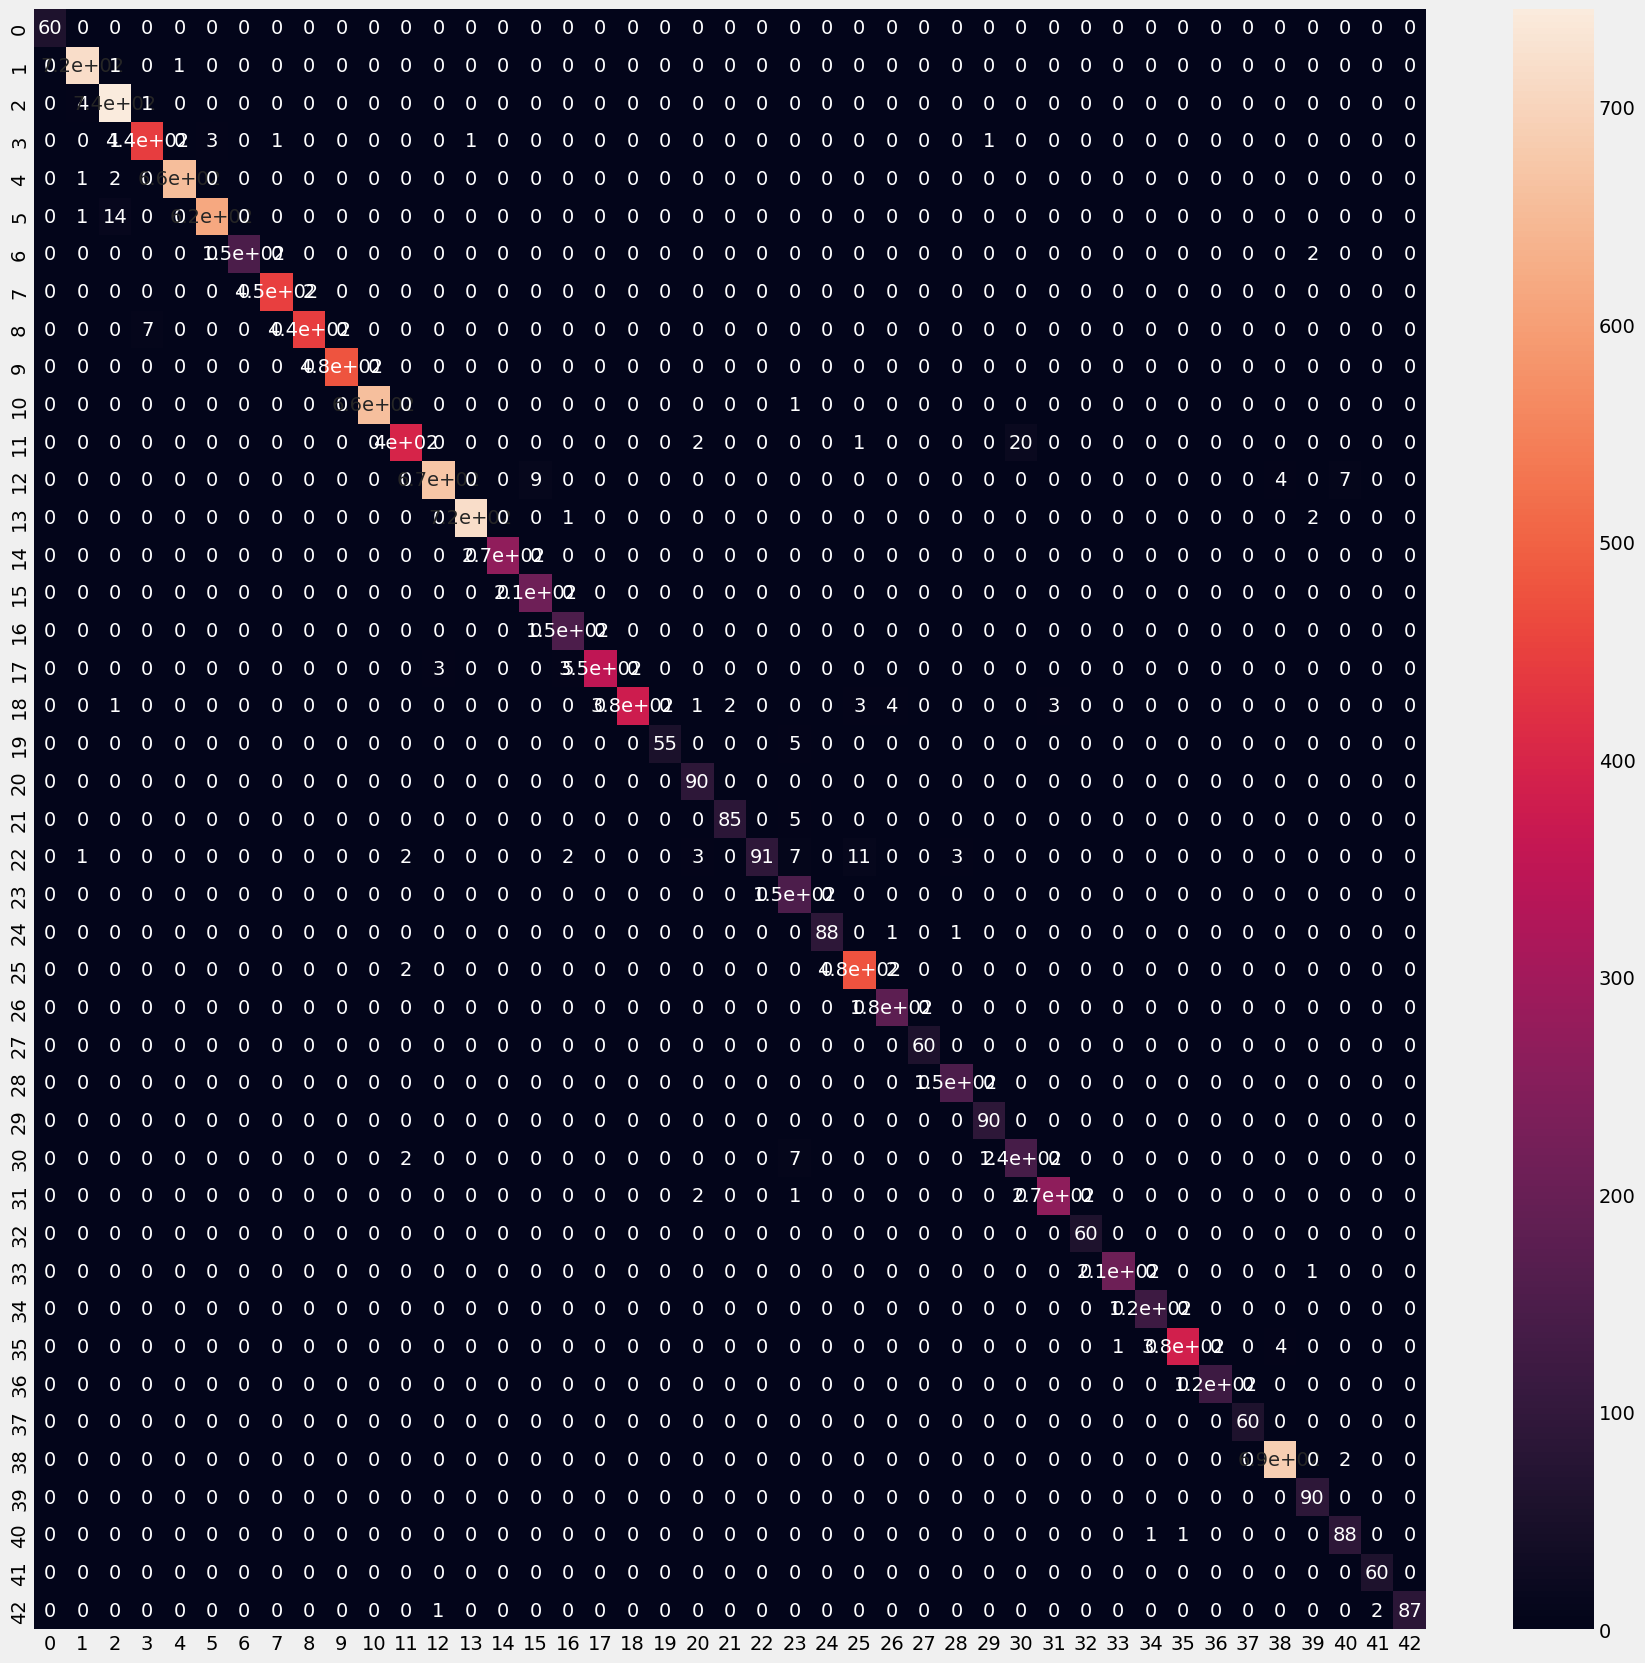

In [22]:
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

## classification report

In [23]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      0.99       720
           2       0.98      0.99      0.98       750
           3       0.98      0.98      0.98       450
           4       1.00      1.00      1.00       660
           5       1.00      0.98      0.99       630
           6       1.00      0.99      0.99       150
           7       1.00      1.00      1.00       450
           8       1.00      0.98      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      0.95      0.96       420
          12       0.99      0.97      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       0.95      1.00      0.97       150
          17       1.00    

## Model Testing

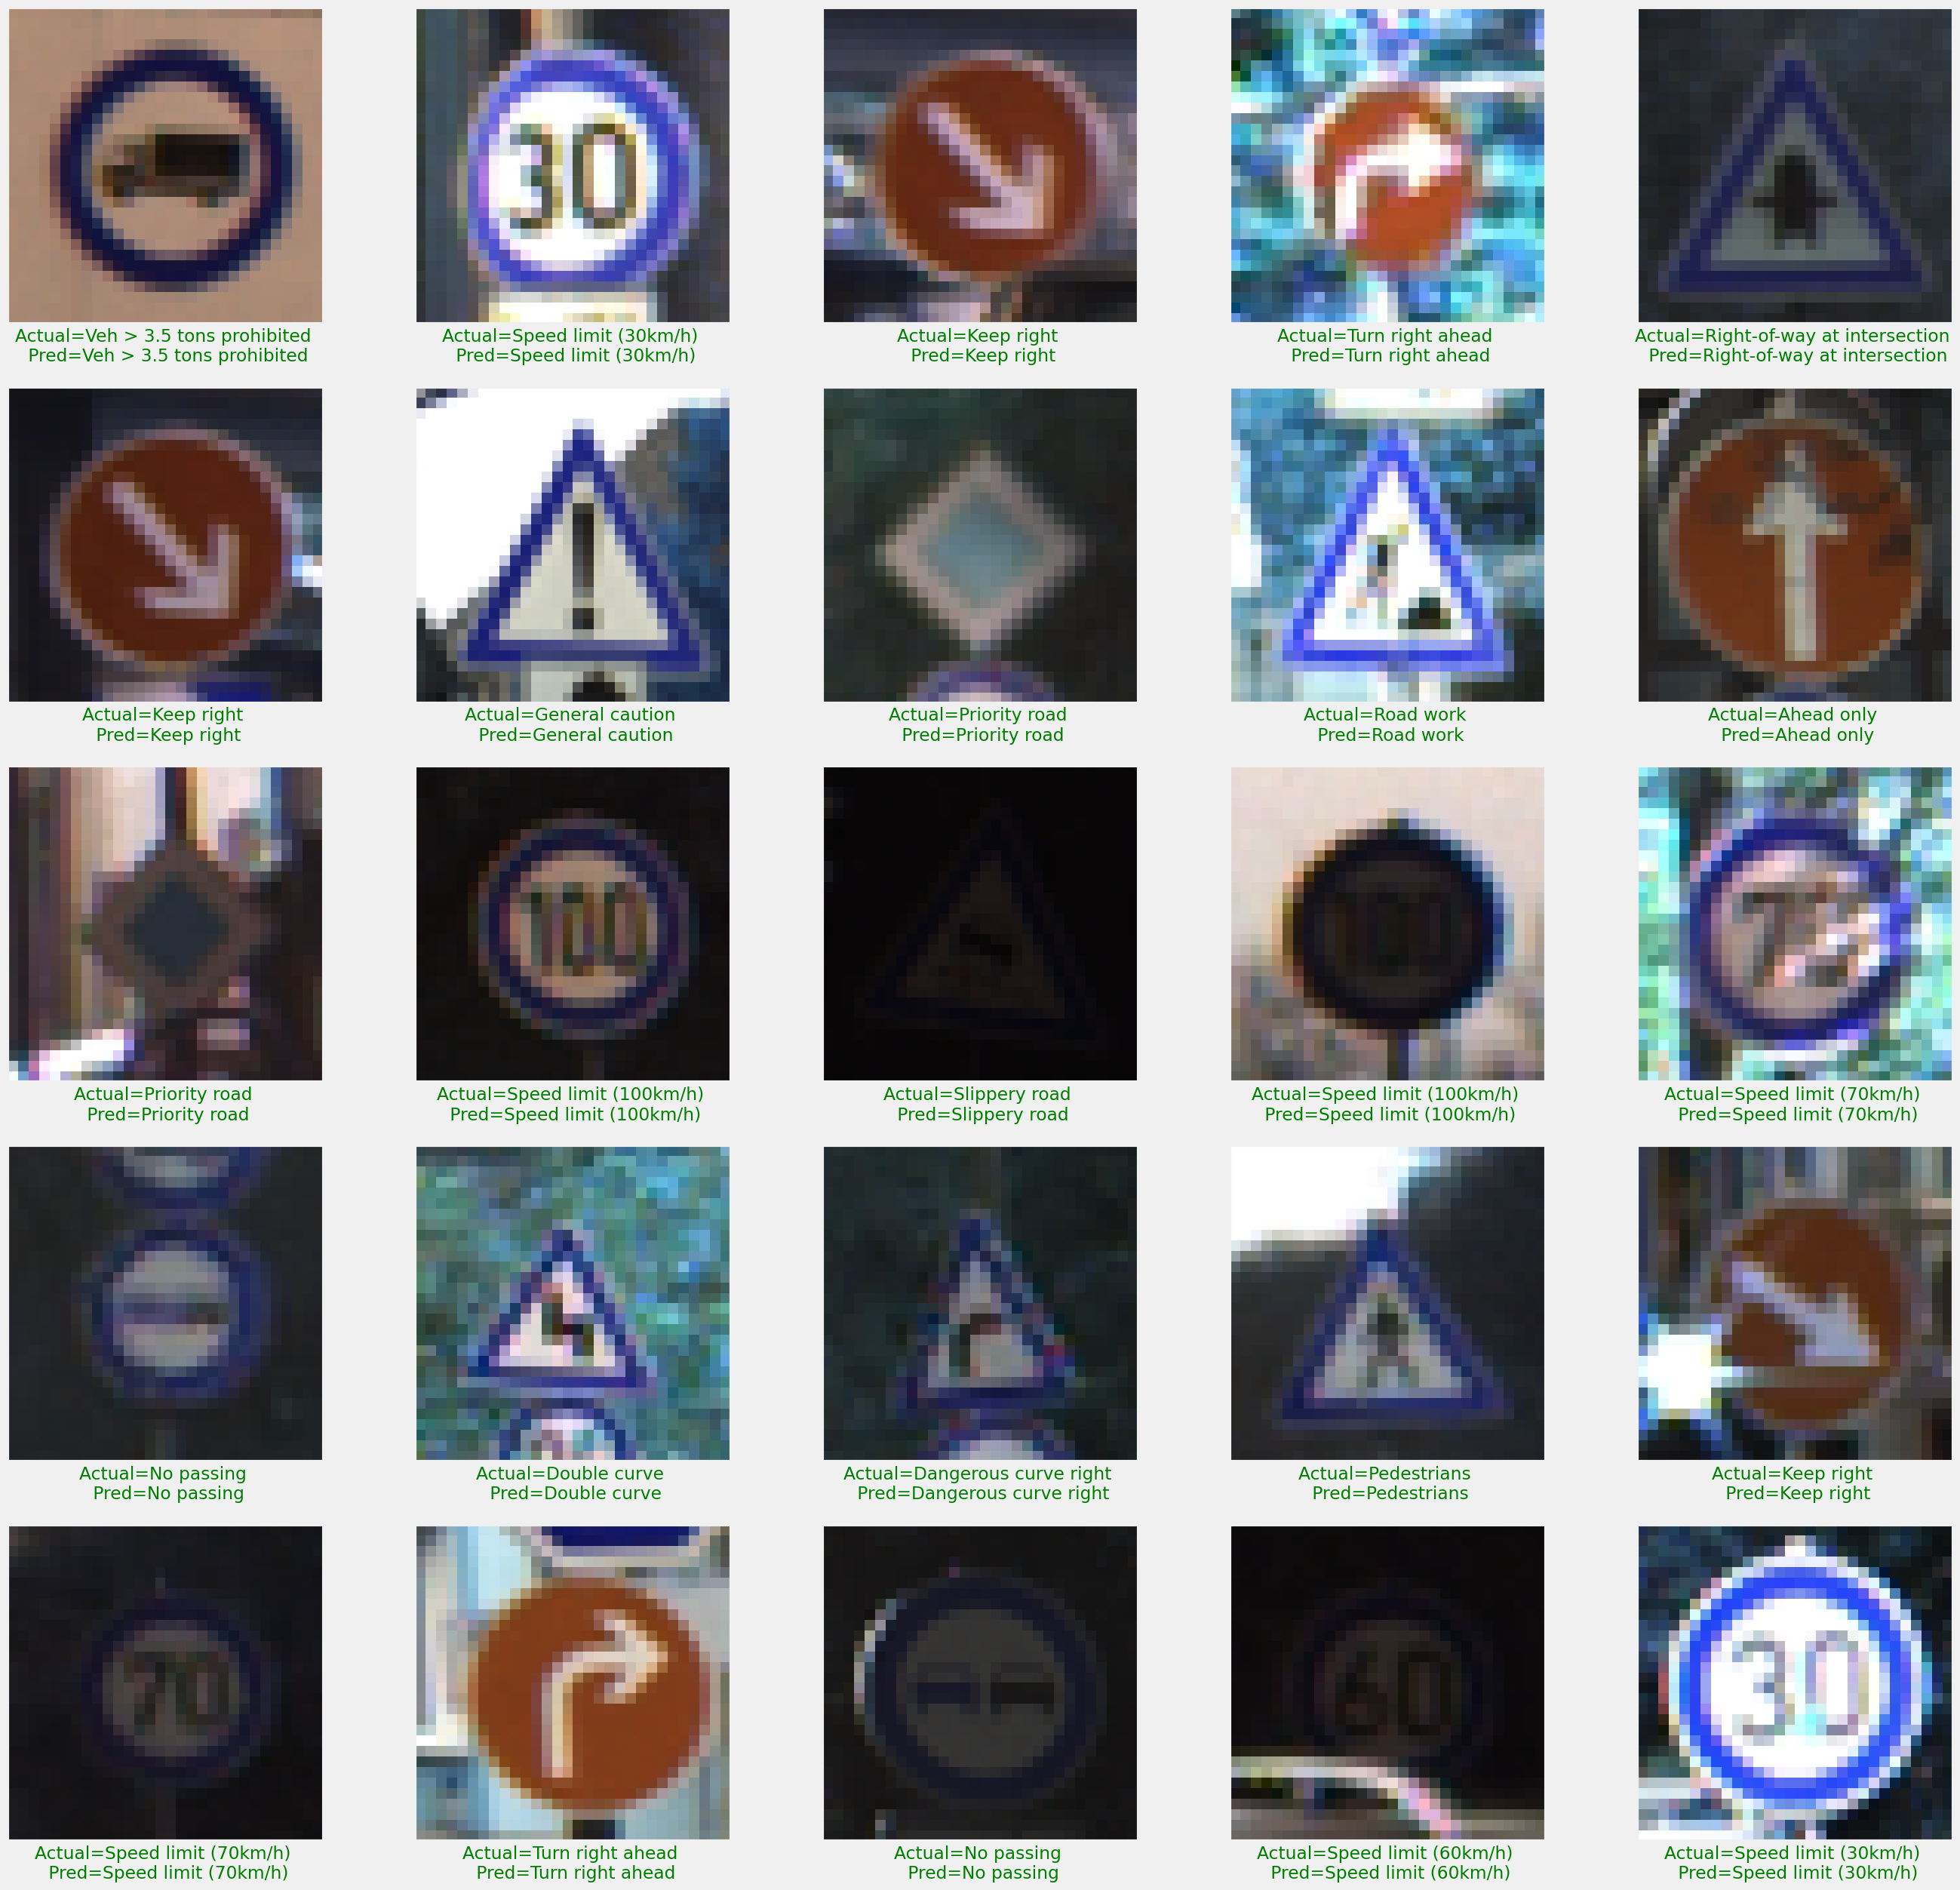

In [24]:
plt.figure(figsize=(30, 30))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    class_name_actual = classes[actual]
    class_name_pred = classes[prediction]
    plt.xlabel('Actual={} \n Pred={}'.format(class_name_actual, class_name_pred), color=col)
    plt.imshow(X_test[start_index + i])
plt.show()